# Analyse und Visualisierung eines Entscheidungsbaums für Predictive Maintenance
In diesem Notebook werden wir einen Entscheidungsbaum aus einem Random Forest-Modell für die vorausschauende Wartung (Predictive Maintenance) visualisieren und interpretieren. Wir verwenden einen Datensatz eines Industrieroboters, der verschiedene Sensorwerte und Betriebsdaten enthält.

# Analyse und Visualisierung eines Entscheidungsbaums für Predictive Maintenance
In diesem Notebook werden wir einen Entscheidungsbaum aus einem Random Forest-Modell für die vorausschauende Wartung (Predictive Maintenance) visualisieren und interpretieren. Wir verwenden einen Datensatz eines Industrieroboters, der verschiedene Sensorwerte und Betriebsdaten enthält.

## 1. Importieren der notwendigen Bibliotheken
Zunächst importieren wir die notwendigen Bibliotheken für Datenanalyse, Visualisierung und maschinelles Lernen.

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display

## 2. Laden und Überprüfen der Daten
Wir laden den Datensatz und überprüfen die ersten Zeilen sowie einige grundlegende Statistiken und mögliche fehlende Werte.

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/eylift/AI-based_Predictive_Maintenance/main/industrieroboter_wartung_data.csv')  # Raw GitHub path to the dataset
display(data.head())  # Anzeige der ersten Zeilen des Datensatzes
display(data.describe())  # Grundlegende statistische Zusammenfassung
display(data.isnull().sum())  # Überprüfung auf fehlende Werte

,stromverbrauch_kwh,motorlast_prozent,temperatur_celsius,druck_bar,vibration_mm_s,betriebsstunden,wartung_notwendig
0,10.496714,78.577874,52.027862,5.378494,3.281485,2699.677718,1
1,9.861736,80.607845,57.003125,4.538917,2.845187,2462.316841,0
2,10.647689,85.830512,60.026218,5.434803,3.028836,2029.815185,1
3,11.523030,85.538021,60.234903,5.677819,2.861317,1676.531611,0
4,9.765847,61.223306,57.749673,5.206717,2.869651,2349.111657,0


,stromverbrauch_kwh,motorlast_prozent,temperatur_celsius,druck_bar,vibration_mm_s,betriebsstunden,wartung_notwendig
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,9.959229,75.858682,59.571725,5.004483,3.038475,2066.816508,0.540000
std,0.931004,9.870038,4.970210,0.509787,0.286780,515.160958,0.499648
min,7.380255,42.587327,47.641777,3.651557,2.272836,551.872311,0.000000
25%,9.294872,68.941625,56.030608,4.646765,2.840730,1747.936880,0.000000
50%,9.995808,75.788393,59.612000,5.011131,3.039161,2098.877597,1.000000
75%,10.500852,81.872311,62.860441,5.342589,3.215495,2436.732891,1.000000
max,12.720169,113.527315,75.394404,6.316191,3.758080,3219.876203,1.000000


stromverbrauch_kwh    0
motorlast_prozent     0
temperatur_celsius    0
druck_bar             0
vibration_mm_s        0
betriebsstunden       0
wartung_notwendig     0
dtype: int64

## 3. Datenvorbereitung und Aufteilung
In diesem Schritt bereiten wir die Daten für das Training des Modells vor. Wir teilen den Datensatz in Merkmale (X) und Zielvariable (y) auf. Anschließend teilen wir die Daten in Trainings- und Testsets, um die Leistung des Modells später bewerten zu können.

In [10]:
# Annahme: Zielvariable ist die letzte Spalte im Datensatz
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Training des Random Forest Modells
In diesem Schritt trainieren wir einen Random Forest Classifier mit den Trainingsdaten. Random Forest ist ein Ensemble-Lernverfahren, das mehrere Entscheidungsbäume kombiniert, um die Vorhersagegenauigkeit zu verbessern und Überanpassung zu vermeiden.

In [11]:
# Initialisieren und trainieren des Random Forest Classifiers
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Evaluierung des Modells mit der Konfusionsmatrix
In diesem Schritt bewerten wir die Leistung des trainierten Modells anhand des Testsets. Wir berechnen die Genauigkeit des Modells und erstellen die Konfusionsmatrix sowie den Klassifikationsbericht. Die Konfusionsmatrix gibt Aufschluss über die Anzahl der korrekt und inkorrekt klassifizierten Beispiele.

In [12]:
# Vorhersagen mit dem Testset machen
y_pred = rf_model.predict(X_test)

# Genauigkeit des Modells berechnen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Konfusionsmatrix erstellen
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Klassifikationsbericht erstellen
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Erklärung der Konfusionsmatrix:
# Die Konfusionsmatrix gibt Aufschluss über die Anzahl der korrekt und inkorrekt klassifizierten Beispiele.
# - Die Zeilen stellen die tatsächlichen Klassen dar.
# - Die Spalten stellen die vorhergesagten Klassen dar.
# - Die Diagonalelemente repräsentieren die korrekt klassifizierten Beispiele, während die Nebendiagonalen die falsch klassifizierten Beispiele darstellen.

# Anwendungskontext:
# Die Konfusionsmatrix hilft uns, die Stärken und Schwächen des Modells zu identifizieren.
# In der vorausschauenden Wartung können wir so besser verstehen, wie gut das Modell Wartungsbedarfe erkennt und wo es möglicherweise zu Fehlklassifikationen kommt.

Accuracy: 0.6
Confusion Matrix:
 [[ 9 18]
 [ 6 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.43        27
           1       0.60      0.82      0.69        33

    accuracy                           0.60        60
   macro avg       0.60      0.58      0.56        60
weighted avg       0.60      0.60      0.57        60



## 6. Analyse der Merkmalswichtigkeit
In diesem Schritt analysieren wir die Wichtigkeit der Merkmale für das Modell. Die Merkmalswichtigkeit gibt an, wie bedeutend jedes Merkmal für die Entscheidungsfindung des Modells ist.

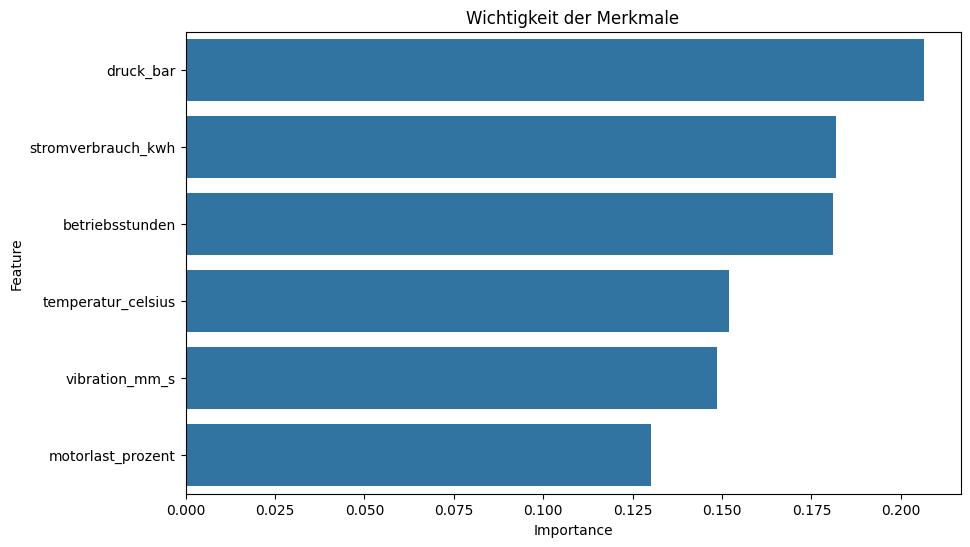

In [13]:
# Analyse der Merkmalswichtigkeit
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisierung der Merkmalswichtigkeit
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Wichtigkeit der Merkmale')
plt.show()

# Erklärung der Merkmalswichtigkeit:
# Die Merkmalswichtigkeit zeigt, welche Merkmale das Modell am meisten beeinflusst haben.
# Höhere Werte deuten darauf hin, dass das Merkmal wichtiger für die Entscheidungsfindung des Modells war.

# Anwendungskontext:
# Durch die Analyse der Merkmalswichtigkeit können wir verstehen, welche Faktoren am stärksten zur Vorhersage von Wartungsbedarfen beitragen.
# Dies hilft uns, präventive Wartungsstrategien zu entwickeln und die Effizienz der Anlagen zu verbessern.

## 7. Visualisierung des Entscheidungsbaums
In diesem Schritt extrahieren und visualisieren wir einen einzelnen Entscheidungsbaum aus dem trainierten Random Forest Modell. Die Visualisierung hilft uns zu verstehen, wie das Modell Entscheidungen trifft und welche Merkmale dabei eine wichtige Rolle spielen.

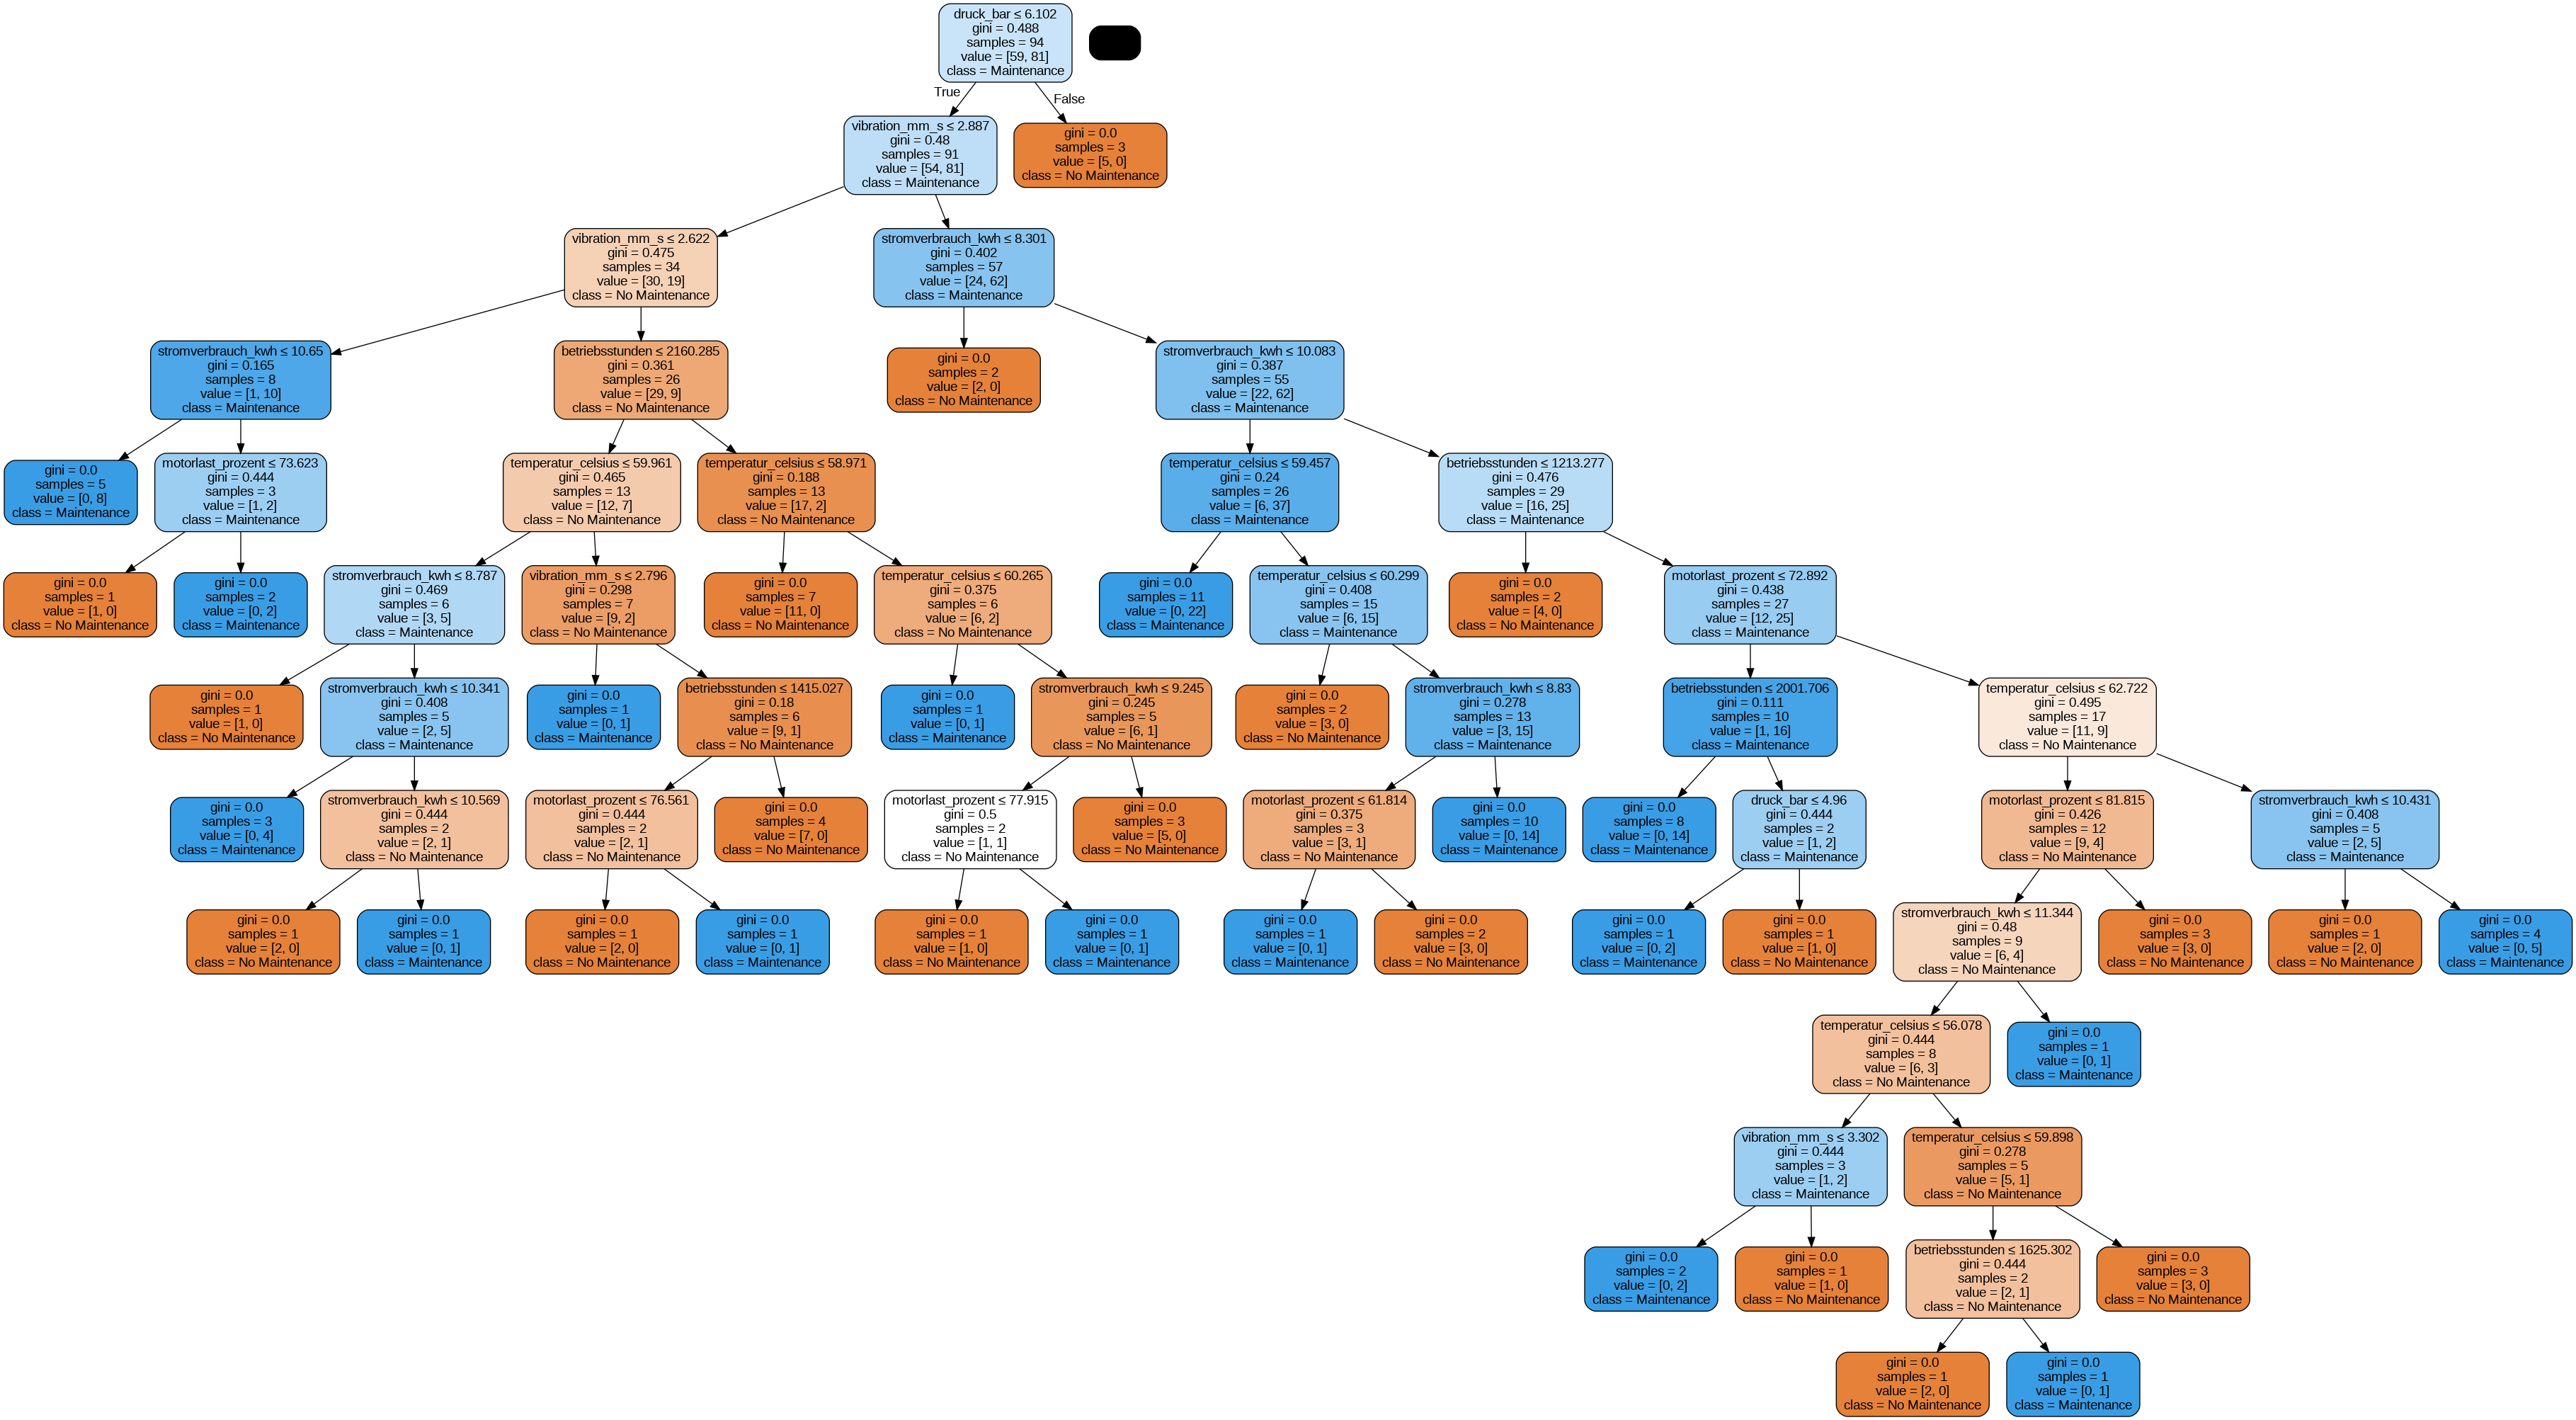

In [14]:
# Extrahieren eines einzelnen Entscheidungsbaums aus dem Random Forest
estimator = rf_model.estimators_[0]

# Exportieren des Entscheidungsbaums in das DOT-Format
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Maintenance', 'Maintenance'],
                           filled=True, rounded=True,
                           special_characters=True)

# Erstellen eines Graphen aus den DOT-Daten
graph = pydotplus.graph_from_dot_data(dot_data)

# Speichern des Entscheidungsbaums als PNG-Datei
graph.write_png('decision_tree.png')

# Anzeigen des gespeicherten Entscheidungsbaums
Image(filename='decision_tree.png')

## 8. Interpretation des Entscheidungsbaums
Der Entscheidungsbaum ist ein grafisches Modell, das zeigt, wie Entscheidungen basierend auf den Eingabedaten getroffen werden. Jeder Knoten stellt eine Entscheidung basierend auf einem Merkmal und einem Schwellenwert dar, die zu zwei oder mehr Verzweigungen führt. Die Blätter am Ende der Zweige repräsentieren die endgültigen Entscheidungen oder Klassifizierungen.

- **Merkmal und Schwellenwert**: Jeder Knoten zeigt das Merkmal und den Schwellenwert, der verwendet wird, um die Daten zu teilen.
- **Gini-Index**: Ein Maß für die Unreinheit oder Unordnung des Knotens. Ein niedrigerer Wert bedeutet eine reinere Teilung.
- **Anzahl der Beispiele**: Die Anzahl der Datenpunkte, die zu diesem Knoten gehören.
- **Verteilung der Klassen**: Die Anzahl der Datenpunkte in den verschiedenen Klassen.
- **Vorhersage**: Die häufigste Klasse, die als Vorhersage verwendet wird.

Durch das Verständnis der Struktur und der Entscheidungen des Entscheidungsbaums können wir die Entscheidungsfindung des Modells besser interpretieren und nachvollziehen.

# Bedeutung für die Analyse von Maschinendaten zur Instandhaltung industrieller Anlagen:
Diese Methode ermöglicht es uns, die wichtigsten Faktoren zu identifizieren, die zu Wartungsbedarf führen. Sie hilft uns, präventive Maßnahmen zu planen und somit die Zuverlässigkeit und Effizienz der Anlagen zu erhöhen.